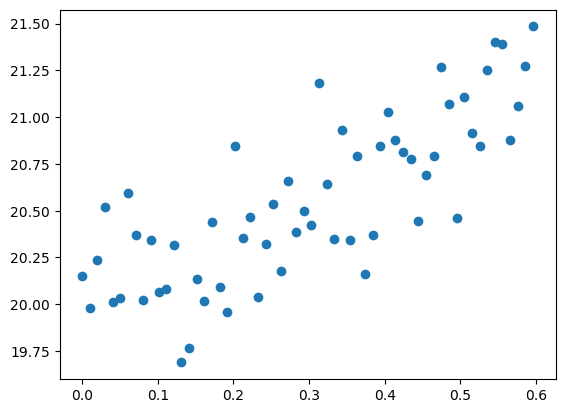

Epoch 0: w0=0.014424686549778576, w1=2.2585688979191545, mse=412.3360900878906
Epoch 10: w0=3.6194436455951884, w1=3.328011532501674, mse=265.58306884765625
Epoch 20: w0=6.512478370784397, w1=4.179376965240931, mse=171.19468688964844
Epoch 30: w0=8.834514389155977, w1=4.855886917786099, mse=110.4847183227539
Epoch 40: w0=10.698617897151584, w1=5.392203603462675, mse=71.43509674072266
Epoch 50: w0=12.195463781474702, w1=5.81612473793457, mse=46.3163948059082
Epoch 60: w0=13.397770748256317, w1=6.149942956642608, mse=30.15741539001465
Epoch 70: w0=14.363856659053436, w1=6.411536038593749, mse=19.760923385620117
Epoch 80: w0=15.140490641711823, w1=6.615241189674836, mse=13.070629119873047
Epoch 90: w0=15.765180139659513, w1=6.772556193546753, mse=8.764019966125488
Epoch 100: w0=16.26800471794473, w1=6.892701653913956, mse=5.990524768829346
Epoch 110: w0=16.67308738243448, w1=6.9830720270438, mse=4.20308780670166
Epoch 120: w0=16.99977393638956, w1=7.049597210959893, mse=3.0498764514923096

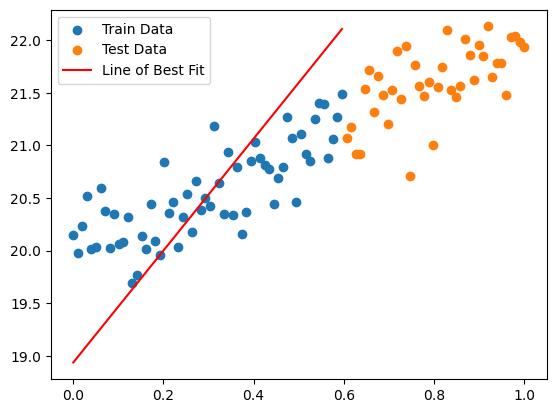

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Завантажимо дані пропускаючи хедери
with open('lab_1_train.csv', 'r') as f:
    reader = csv.reader(f)
    train_data = list(reader)[1:]
train_data = np.array(train_data, dtype=np.float32)

with open('lab_1_test.csv', 'r') as f:
    reader = csv.reader(f)
    test_data = list(reader)[1:]
test_data = np.array(test_data, dtype=np.float32)

#Розділимо колонки x та y
x_train = train_data[:, 1]
y_train = train_data[:, 2]

x_test = test_data[:, 1]
y_test = test_data[:, 2]

#Виведемо дані train датасету
plt.scatter(x_train, y_train)
plt.show()

#Запишемо рандомні ваги, а також визначимо learning rate і кількість епох
w0 = np.random.randn()
w1 = np.random.randn()

learning_rate = 0.01
num_epochs = 1000

#Градієнтний спуск
for epoch in range(num_epochs):
    #спрогнозуємо y для поточних ваг і порахуємо MSE втрати
    y_pred = w0 + w1 * x_train
    
    mse = np.mean((y_pred - y_train)**2)
    
    #Порахуємо градієнти втрат враховуючи w0 і w1 і оновимо ваги
    dw0 = 2 * np.mean(y_pred - y_train)
    dw1 = 2 * np.mean((y_pred - y_train) * x_train)
    
    w0 -= learning_rate * dw0
    w1 -= learning_rate * dw1
    
    #Друкуємо поточні ваги кожні 10 епох
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: w0={w0}, w1={w1}, mse={mse}")
        
#Тепер спрогнозуємо значення y для тестових даних, використовуючи оптимальні ваги
y_pred_test = w0 + w1 * x_test

#І порахуємо MSE втрати для тестового датасету
mse_test = np.mean((y_pred_test - y_test)**2)
print(f"Test MSE: {mse_test}")

#Виведемо те, що необхідно, на графік
plt.scatter(x_train, y_train, label="Train Data")
plt.scatter(x_test, y_test, label="Test Data")
plt.plot(x_train, w0 + w1 * x_train, color='red', label="Line of Best Fit")
plt.legend()
plt.show()